# Clustering Algorithm on Iris Dataset

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading iris dataset
from sklearn.datasets import load_iris

In [3]:
#creating an object for iris set
Iris = load_iris()

In [4]:
#creating a dataframe
data = pd.DataFrame(Iris.data, columns=Iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#Target feature 
target = pd.DataFrame(Iris.target)

In [6]:
#concatinating the target feature on main dataset
data = pd.concat([data, target], axis=1)

In [7]:
#naming the target variable
data.rename(columns={0: 'species'}, inplace=True)

In [8]:
#maping the species feature with its own target feature names
data['species'] = data['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

In [9]:
#checking the shape of the dataset
data.shape

(150, 5)

In [10]:
#checking the number of categorical and numerical features in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# observation

There are 4 numerical variables and one target feature that is species.

In [11]:
#is there any null values in the dataset
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

# observation

There are no null values present in any of these features.

In [12]:
#altering the feature names for convinience
data.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)':'sepal_width',
                    'petal length (cm)':'petal_length', 'petal width (cm)':'petal_width'}, inplace=True)

In [13]:
#column names
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
#descriptive analysis of the numerical variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


# Univariate Analysis

In [15]:
#importing probplot for plotting Q-Q Plot
from scipy.stats import probplot

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


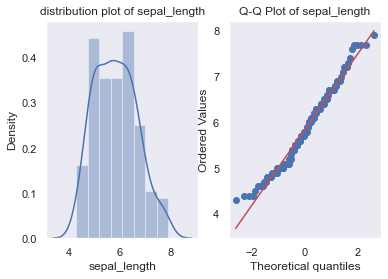

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


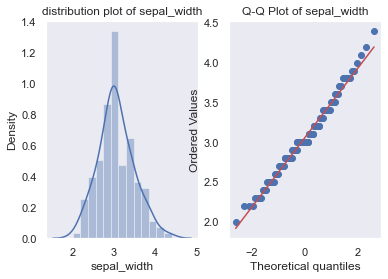

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


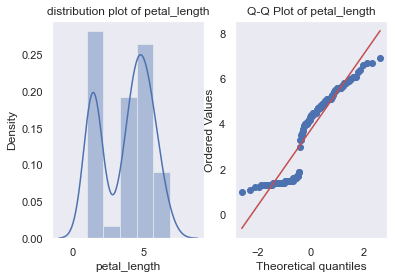

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


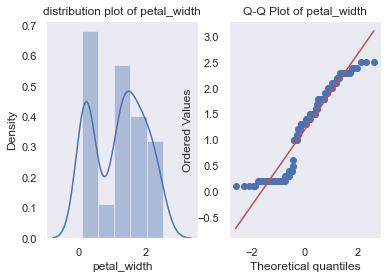

In [16]:
for feature in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    sns.set_theme()
    sns.set_style(style='dark')
    plt.grid()
    plt.subplot(1,2,1)
    sns.distplot(data[feature])
    plt.title('distribution plot of {}'.format(feature))
    plt.subplot(1,2,2)
    probplot(data[feature], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot of {}'.format(feature))
    plt.show()

# observation

1. sepal length and sepal width are normally distributed
2. petal length and petal width are approximately normally distributed

In [17]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

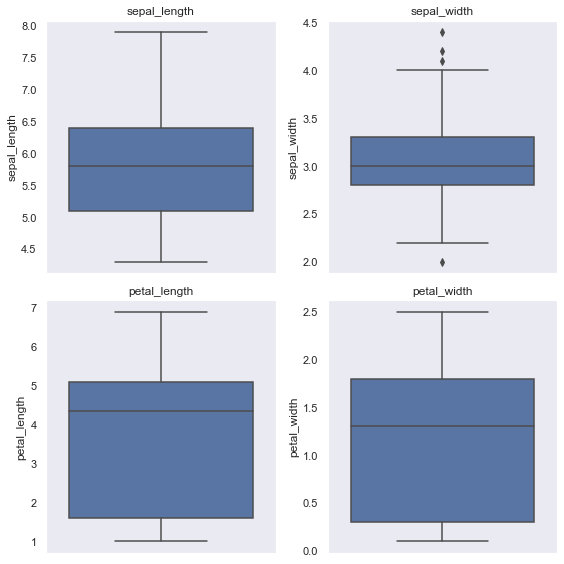

In [18]:
#checking the outliers present in the dataset
plt.figure(figsize=(8,8))
for i in range(len(features)):
    plt.subplot(2,2, i+1)
    sns.boxplot(y=data[features[i]])
    plt.title('{}'.format(features[i]))
    plt.tight_layout()

# observation

There are outliers present in the sepal width feature.

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

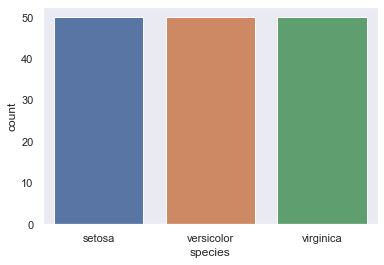

In [19]:
#count plot of target feature
sns.countplot(data['species'])

# observation

The target variable is balanced, all the categories present are equal, there is no imbalance.

# Bivariate Analysis

Text(0.5, 1.0, 'species vs sepal length')

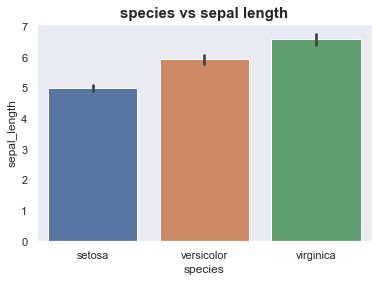

In [20]:
#species vs sepal length
sns.barplot(x=data['species'], y=data.sepal_length)
plt.title('species vs sepal length', fontsize=15, fontweight='bold')

# observation

Virginica has high sepal length followed by versicolor and setosa.

Text(0.5, 1.0, 'species vs sepal width')

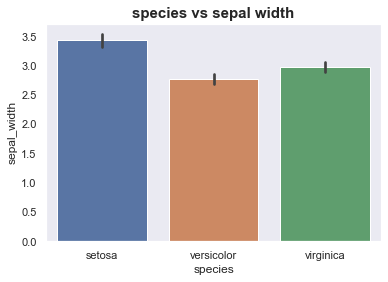

In [21]:
#species vs sepal width
sns.barplot(x=data['species'], y=data.sepal_width)
plt.title('species vs sepal width', fontsize=15, fontweight='bold')

# observation

Setosa has high sepal width followed by virginica and versicolor.

Text(0.5, 1.0, 'species vs petal width')

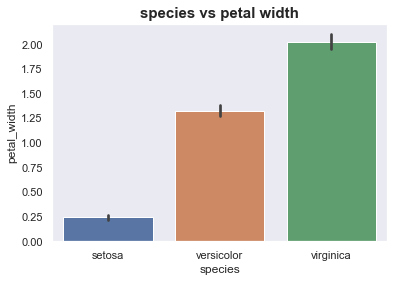

In [22]:
#species vs petal width
sns.barplot(x=data['species'], y=data.petal_width)
plt.title('species vs petal width', fontsize=15, fontweight='bold')

# observation

As same as sepal width, virginica has high petal width followed by versicolor and setosa.

Text(0.5, 1.0, 'species vs petal length')

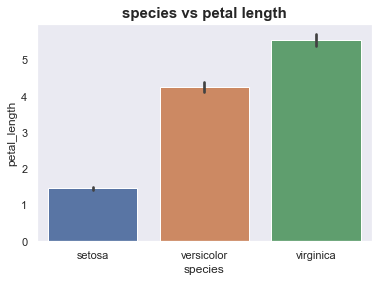

In [23]:
#species vs petal length
sns.barplot(x=data['species'], y=data.petal_length)
plt.title('species vs petal length', fontsize=15, fontweight='bold')

# observation

The petal length of virginica is high.

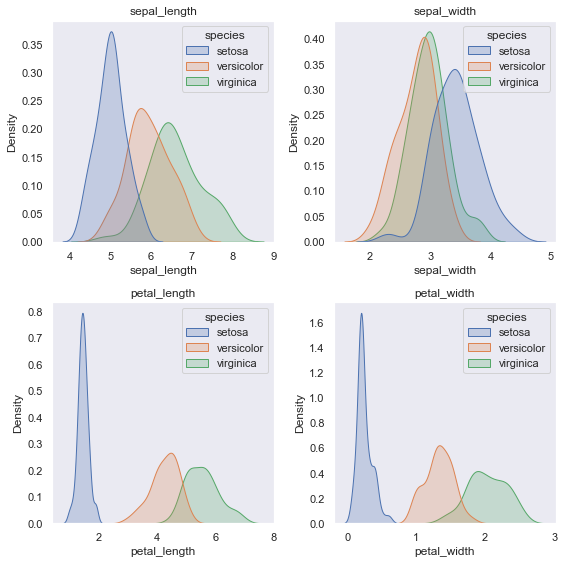

In [24]:
#kde plot of the features 
plt.figure(figsize=(8,8))
for i in range(len(features)):
    plt.subplot(2,2, i+1)
    sns.kdeplot(x=data[features[i]], hue=data['species'], shade=True)
    plt.title('{}'.format(features[i]))
    plt.tight_layout()

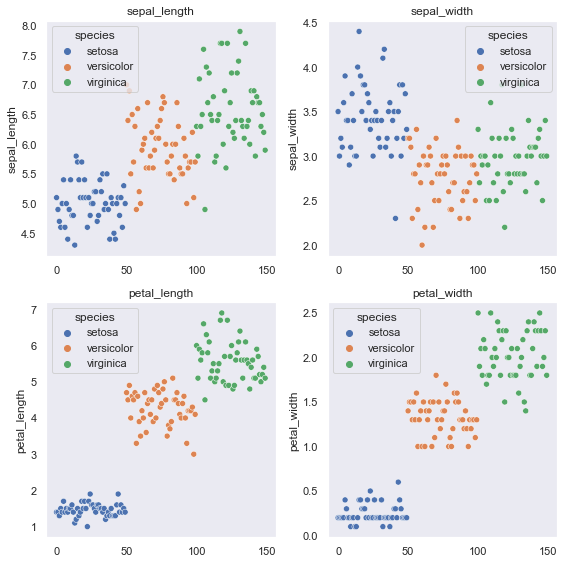

In [25]:
#scatterplot of the feature
plt.figure(figsize=(8,8))
for i in range(len(features)):
    plt.subplot(2,2, i+1)
    sns.scatterplot(x=data[features[i]].index, y=data[features[i]], hue=data.species)
    plt.title('{}'.format(features[i]))
    plt.tight_layout()

In [26]:
#creating the new dataframe(data1) by copying data
data1 = data.copy()

In [27]:
#dropping target feature for analysis
data1.drop('species', axis=1, inplace=True)

# Multivariate Analysis

<Figure size 720x720 with 0 Axes>

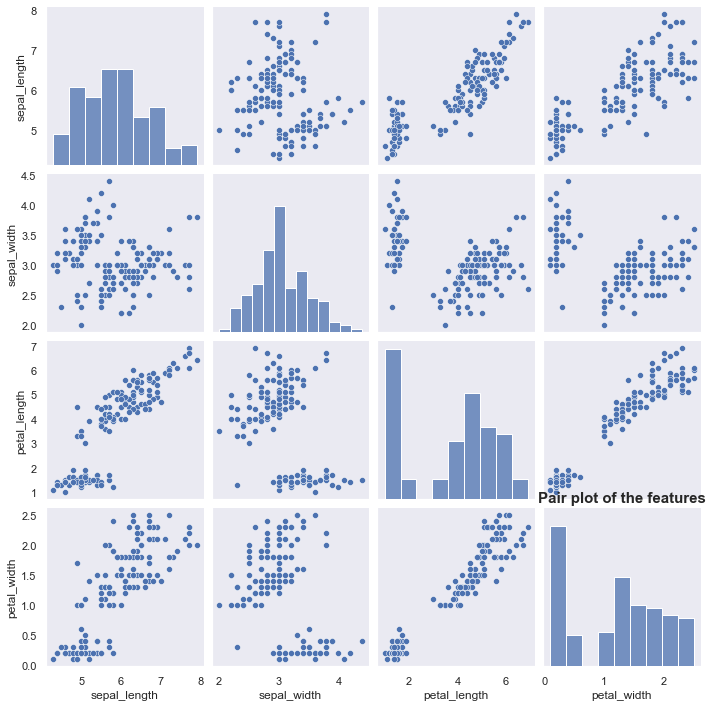

In [28]:
#pair plot of the features
plt.figure(figsize=(10,10))
sns.pairplot(data1)
plt.title('Pair plot of the features', fontsize=15, fontweight='bold')
plt.show()

In [29]:
#checking the corealtion between the variables
round(data1.corr(), 2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


<AxesSubplot:>

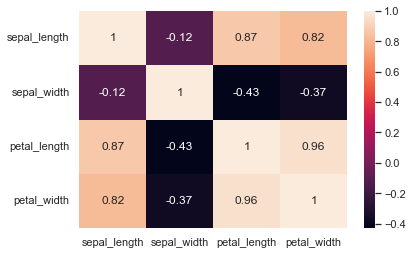

In [30]:
#visualizing the corealtion of the variables
sns.heatmap(round(data1.corr(), 2), annot=True)

# observation

1. petal width and petal length have high corelation of 0.96
2. petal width and sepal length have corelation of 0.82
3. sepal length and petal length have corelation of 0.87

There are high chances of mulitcolinearity

In [31]:
pip install pyclustertend

  Using cached pyclustertend-1.8.2-py3-none-any.whl (7.2 kB)
  Using cached numba-0.54.1-cp39-cp39-win_amd64.whl (2.3 MB)
  Using cached llvmlite-0.37.0-cp39-cp39-win_amd64.whl (17.0 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


# Scaling the independent features

In [32]:
#importing standard scalar
from sklearn.preprocessing import StandardScaler

In [33]:
#creating object for standard scalar
std = StandardScaler()

In [34]:
#transforming the variables
data1 = pd.DataFrame(std.fit_transform(data1))

In [35]:
#importing kmeans clustering
from sklearn.cluster import KMeans

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

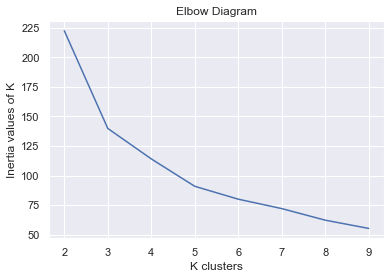

In [36]:
#plotting Elbow Diagram
elbow = []

for k in range (2,10):
    kmean = KMeans(n_clusters=k)
    kmean.fit(data1)
    intertia = kmean.inertia_
    elbow.append([k,intertia])
    
show = pd.DataFrame(elbow)
plt.plot(show[0], show[1])
plt.xlabel('K clusters')
plt.ylabel('Inertia values of K')
plt.title('Elbow Diagram')
plt.grid(visible=True)
plt.show()

In [37]:
#fitting the k value on data1
kmean1 = KMeans(n_clusters=3, verbose=1)
kmean1.fit(data1)

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Initialization complete
Iteration 0, inertia 188.01133114691424.
Iteration 1, inertia 142.58836149632535.
Iteration 2, inertia 141.08010461429686.
Iteration 3, inertia 140.90153181202433.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 227.87453171960894.
Iteration 1, inertia 192.45853645668427.
Iteration 2, inertia 191.56841560894298.
Iteration 3, inertia 191.0247368531796.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 174.28196131590497.
Iteration 1, inertia 142.9576583171744.
Iteration 2, inertia 140.80091677606092.
Iteration 3, inertia 140.33675165332627.
Iteration 4, inertia 139.9635402933636.
Iteration 5, inertia 139.82049635974974.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 154.91375439988258.
Iteration 1, inertia 141.93753073929454.
Iteration 2, inertia 141.08010461429686.
Iteration 3, inertia 140.90153181202433.
Converged at iteration 3: stric

KMeans(n_clusters=3, verbose=1)

In [38]:
#klabels
klabels = pd.DataFrame(kmean1.labels_)

In [39]:
#concatinating the klabels on main dataset
data = pd.concat([data, klabels], axis=1)

In [40]:
#renaming the KLabel colum
data.rename(columns={0: 'KLabels'}, inplace=True)

In [41]:
#importing label encorder for species feature transformartion
from sklearn.preprocessing import LabelEncoder

In [42]:
#mapping the species feature
data['species'] = data['species'].map({'setosa':0, 'versicolor':1, 'virginica': 2})

Text(0.5, 1.0, 'Clustered Label')

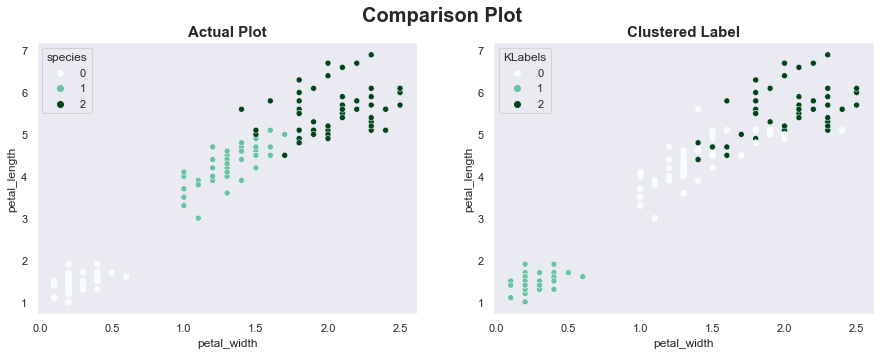

In [43]:
#comparing the actual vs clusted dataset
fig, axes = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Comparison Plot', fontsize=20, fontweight='bold')
sns.scatterplot(x=data.petal_width, y=data.petal_length, hue=data.species, palette='BuGn', ax=axes[0])
axes[0].set_title('Actual Plot', fontsize=15, fontweight='bold')

sns.scatterplot(x=data.petal_width, y=data.petal_length, hue=data.KLabels, palette='BuGn', ax=axes[1])
axes[1].set_title('Clustered Label', fontsize=15, fontweight='bold')

observation

The algorithm has almost classified the groups correctly. 